In [7]:
from initial_classif.trainset.variable_training_sets import *

In [101]:
v = load_all_variable_stars().sort_values(by='virac2_id').reset_index(drop=True)

In [102]:
print(np.unique(v['var_class']))

['CEP' 'DSCT' 'EA/EB' 'EW' 'Ell' 'MIRA' 'OSARG' 'RRab' 'RRc' 'RRd' 'SRV'
 'T2CEP']


In [103]:
v[['virac2_id','var_class']].groupby('var_class').agg('count')

,virac2_id
var_class,
CEP,729
DSCT,294
EA/EB,326556
EW,82813
Ell,24268
MIRA,4164
OSARG,181244
RRab,25474
RRc,10728


In [91]:
from initial_classif.trainset.gaia_extraction import *
import sys
sys.path.append('../../../')
from virac_utils import wsdb_kwargs, wrap, betw

In [66]:
g = generate_gaia_training_set(359.8,2,0.04*60.,0.1*60,50.,**wsdb_kwargs)

In [89]:
from interface_utils.add_stats import *

In [108]:
dsetsV = cm_virac(v[['virac2_id']],**wsdb_kwargs)

In [128]:
small_subset = v[betw(wrap(dsetsV['l']),-0.22,-0.18)&betw(dsetsV['b'],1.95,2.05)].reset_index(drop=True)
small_subsetV = dsetsV[betw(wrap(dsetsV['l']),-0.22,-0.18)&betw(dsetsV['b'],1.95,2.05)].reset_index(drop=True)

In [124]:
dsets = cm_virac_stats_table(small_subset,**wsdb_kwargs)

/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name sourceid is repeated in the output, new name sourceid_1 assigned
  'new name %s assigned') % (_n, curn))


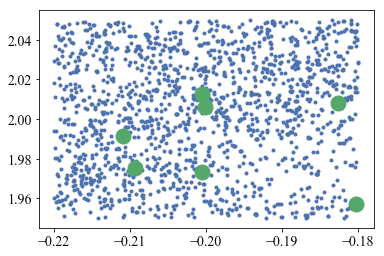

In [132]:
plt.plot(wrap(g['l']),g['b'],'.')
plt.plot(wrap(small_subsetV['l']),small_subsetV['b'],'.',ms=30)

In [140]:
from initial_classif.classifier.classifier import *

In [166]:
g['class']='CONST'
dsets['class']='VAR'

In [182]:
full_data = pd.concat([dsets, g], axis=0, sort=False)
    
classfier = binary_classification(full_data)

15 sources removed from clip.
1573 sources left
       ks_kurtosis
class             
CONST         1566
VAR              7


In [187]:
classfier.cr

'              precision    recall  f1-score   support\n\n       CONST       1.00      0.98      0.99      1566\n         VAR       0.00      0.00      0.00         7\n\n    accuracy                           0.98      1573\n   macro avg       0.50      0.49      0.49      1573\nweighted avg       0.99      0.98      0.98      1573\n'